# Simple LIF network

In [9]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime
    
def visualise_connectivity(S):
    '''Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        if S.w[i,j]>0:
            plot([0, 1], [i, j], '-g')
        else:
            plot([0, 1], [i, j], '-r')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    
    subplot(122)
    for i, j in zip(S.i, S.j):
        if S.w[i,j]>0:
            plot(i, j, 'og')
        else:
            plot(i, j, 'or')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    
    '''
    
    for m in range(10):
        figure()
        new_w = np.reshape(S.w[:,m],[5,5])
        for a in range(5):
            for b in range(5):
                if new_w[a,b]>0:
                    plot(b, 5-a, 'og')
                else:
                    plot(b, 5-a, 'or')
                
start_scope()

## Network design - Layer 1

In [10]:
N1 = 5**2

eqs1 = '''
dv/dt = (I-v)/(5*ms) : 1 (unless refractory)
I : 1
'''
G1 = NeuronGroup(N1, eqs1, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='euler')

photo_pattern = np.array([[1, 1, 1, 1, 1,
                           1, 0, 0, 0, 0,
                           1, 0, 0, 0, 0,
                           1, 0, 0, 0, 0,
                           1, 1, 1, 1, 1],
                          
                          [1, 1, 1, 0, 0,
                           1, 0, 0, 1, 0,
                           1, 0, 0, 0, 1,
                           1, 0, 0, 1, 0,
                           1, 1, 1, 0, 0],
                          
                          [1, 0, 0, 0, 1,
                           1, 0, 0, 0, 1,
                           1, 1, 1, 1, 1,
                           1, 0, 0, 0, 1,
                           1, 0, 0, 0, 1],
                          
                          [1, 0, 0, 0, 1,
                           1, 0, 0, 1, 0,
                           1, 1, 1, 0, 0,
                           1, 0, 0, 1, 0,
                           1, 0, 0, 0, 1],
                          
                          [1, 0, 0, 0, 1,
                           1, 1, 0, 0, 1,
                           1, 0, 1, 0, 1,
                           1, 0, 0, 1, 1,
                           1, 0, 0, 0, 1],
                          
                          [1, 1, 1, 1, 1,
                           1, 0, 0, 0, 1,
                           1, 0, 0, 0, 1,
                           1, 0, 0, 0, 1,
                           1, 1, 1, 1, 1],
                          
                          [1, 1, 1, 1, 1,
                           1, 0, 0, 0, 1,
                           1, 1, 1, 1, 1,
                           1, 0, 1, 0, 0,
                           1, 0, 0, 1, 0],
                          
                          [1, 1, 1, 1, 1,
                           1, 0, 0, 0, 0,
                           1, 1, 1, 1, 1,
                           0, 0, 0, 0, 1,
                           1, 1, 1, 1, 1],
                          
                          [1, 0, 0, 0, 1,
                           1, 0, 0, 0, 1,
                           1, 0, 0, 0, 1,
                           0, 1, 0, 1, 0,
                           0, 0, 1, 0, 0],
                          
                          [1, 1, 1, 1, 1,
                           0, 0, 0, 1, 0,
                           0, 0, 1, 0, 0,
                           0, 1, 0, 0, 0,
                           1, 1, 1, 1, 1]])

## Network design - Layer 2

In [11]:
N2 = 10

eqs2 = '''
dv/dt = (-v)/(5*ms) : 1 (unless refractory)
'''

G2 = NeuronGroup(N2, eqs2, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='euler')

## Network design - Synapses - from L1 to L2

In [12]:
S = Synapses(G1, G2, 'w : 1', on_pre='v_post += w')
S.connect()

for a in range(N2):
    tmp = np.zeros(N1)
    tmp[photo_pattern[a,:]==1] = 1/(np.sum(photo_pattern[a,:]))
    tmp[photo_pattern[a,:]==0] = -1/(N1-np.sum(photo_pattern[a,:]))
    S.w[:,a] = tmp

S.delay = '2*ms'

## Running network

In [21]:
M = StateMonitor(G1, 'v', record=True)
spikeMon = SpikeMonitor(G1)

M2 = StateMonitor(G2, 'v', record=True)
spikeMon2 = SpikeMonitor(G2)

for inp in range(N2):
    G1.I = photo_pattern[inp,:]
    run(200*ms)

## Plotting

WARNING    C:\Users\User\AppData\Local\Temp\ipykernel_7376\79389813.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure()
 [py.warnings]


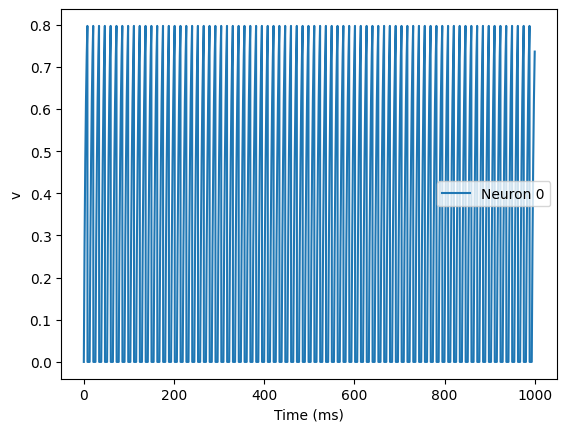

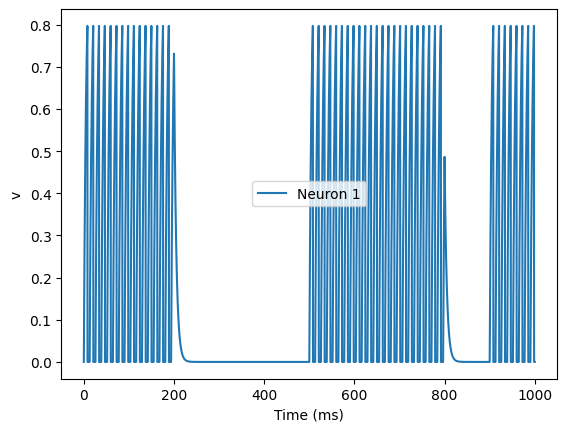

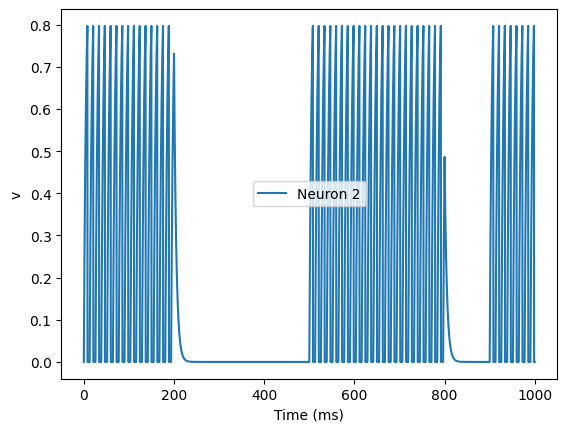

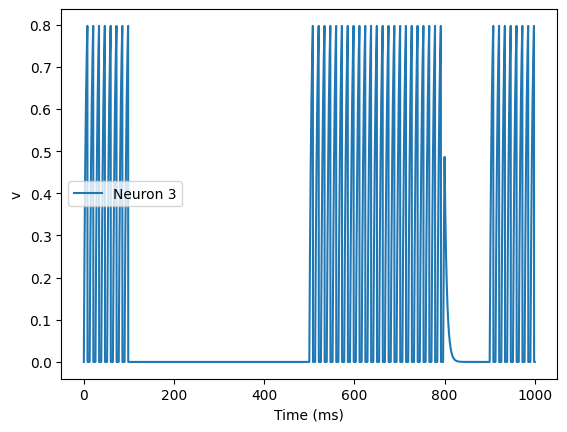

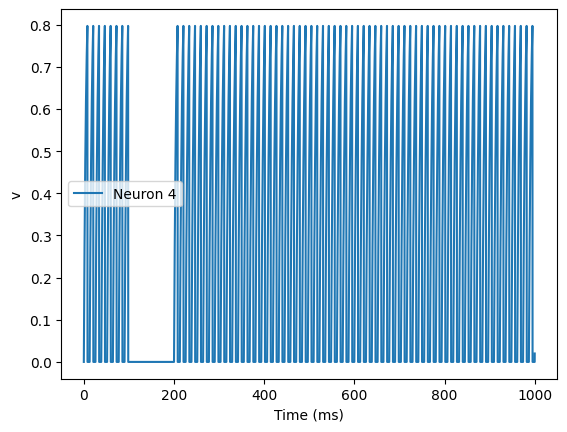

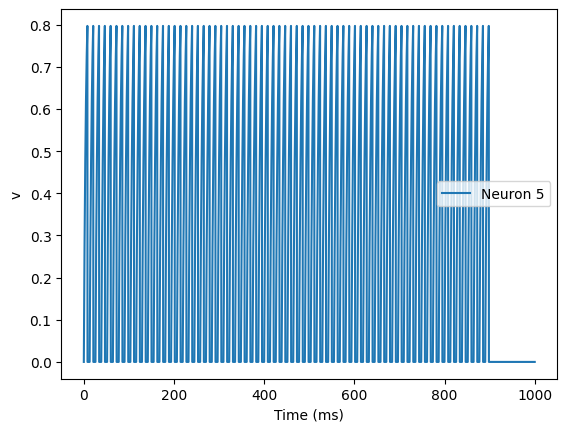

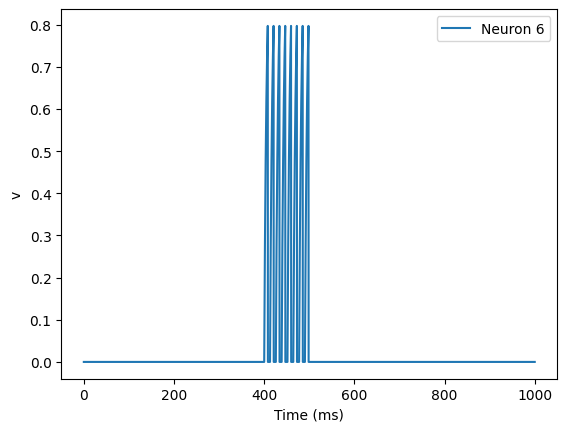

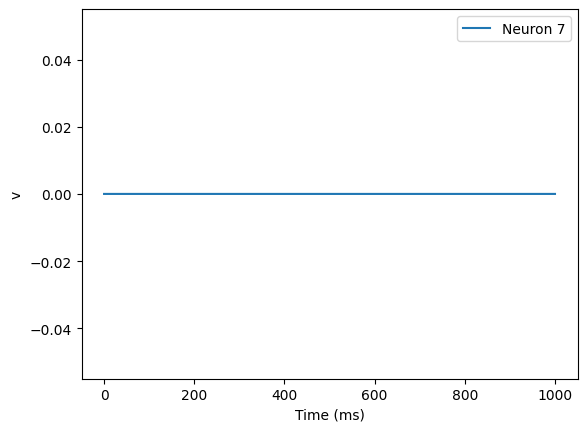

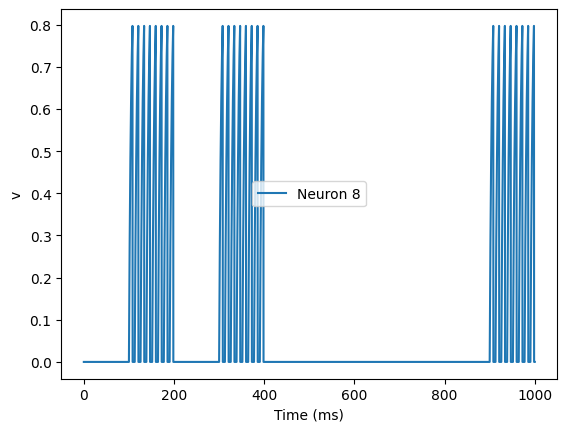

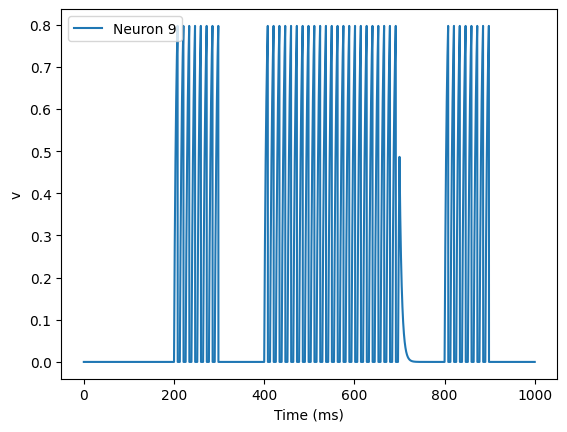

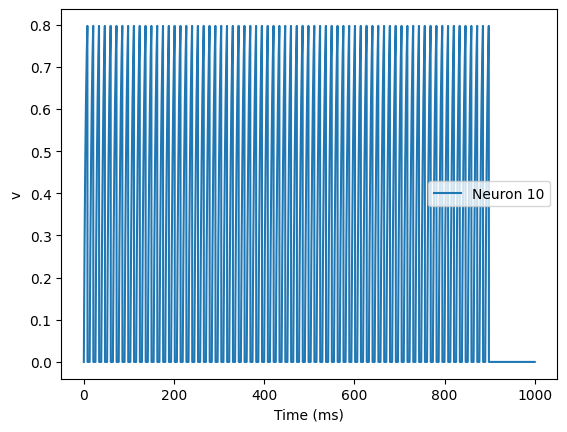

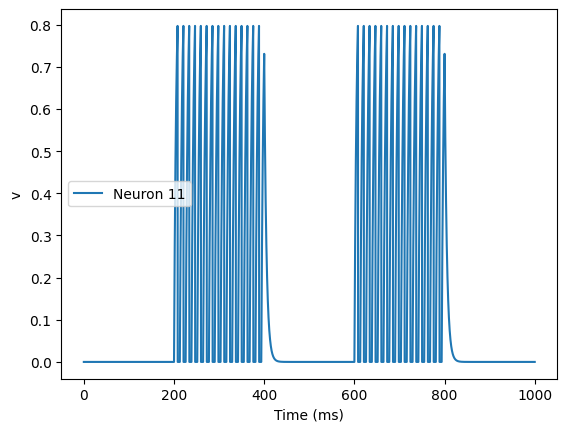

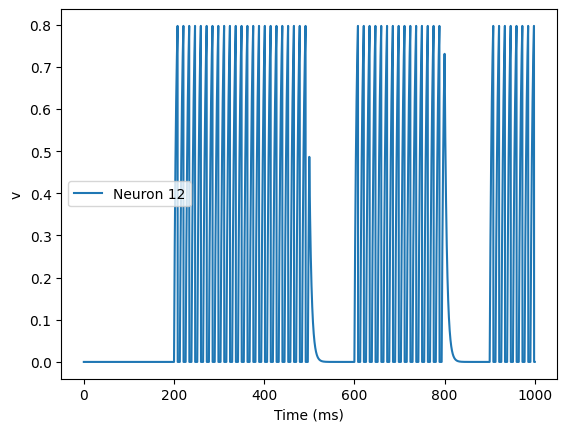

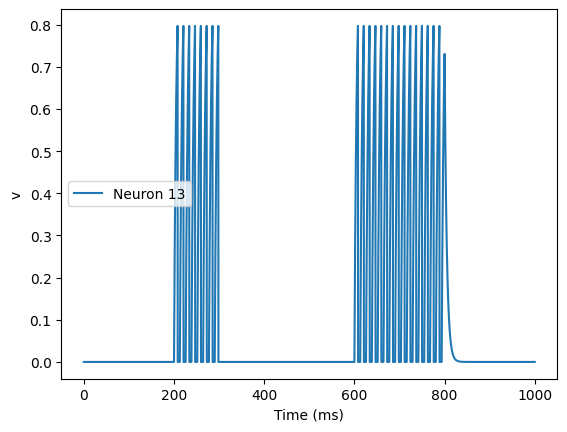

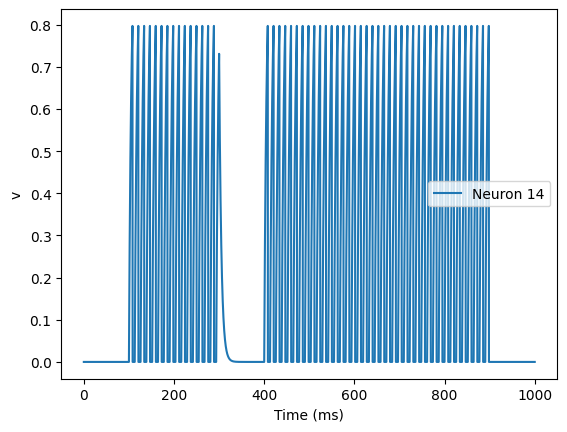

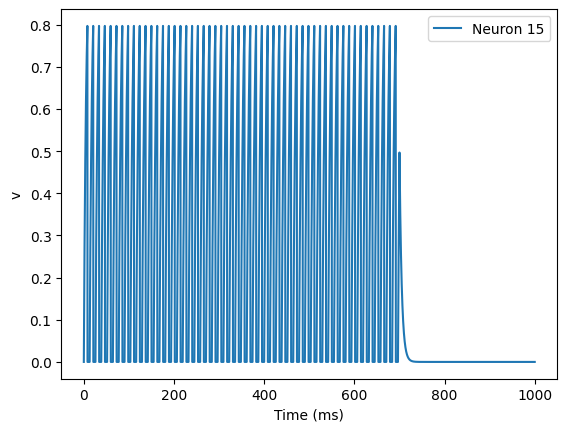

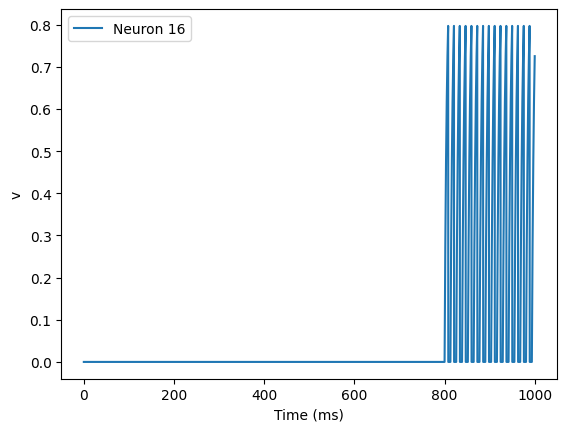

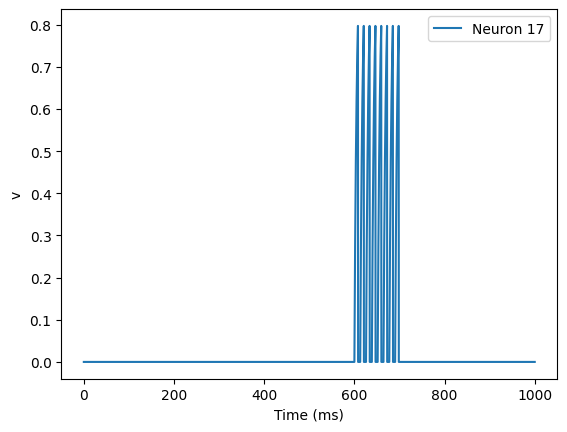

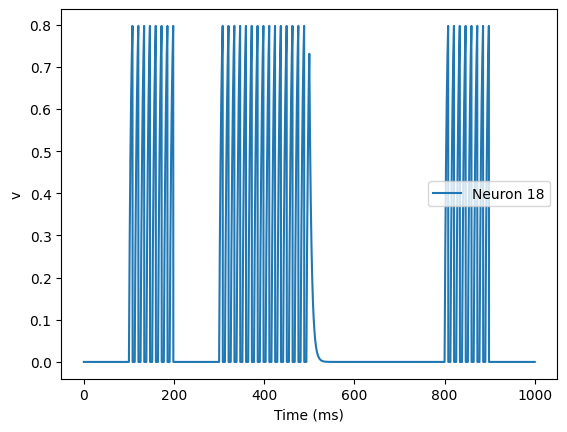

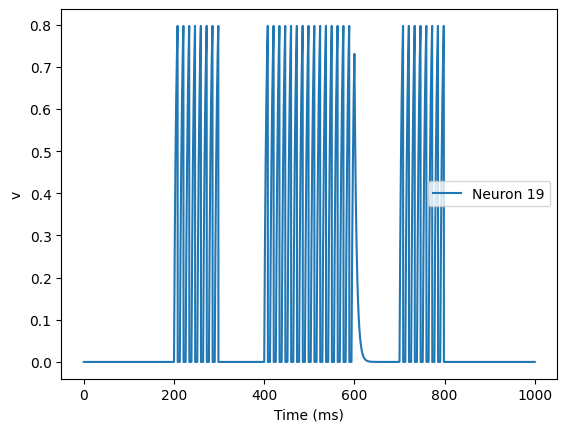

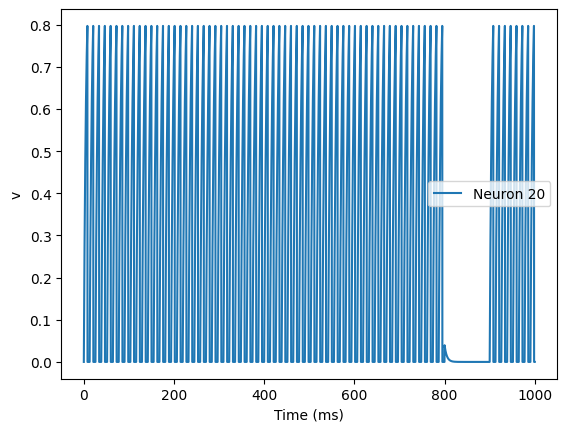

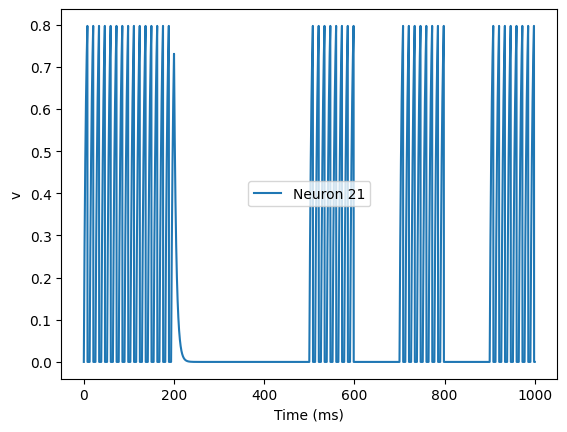

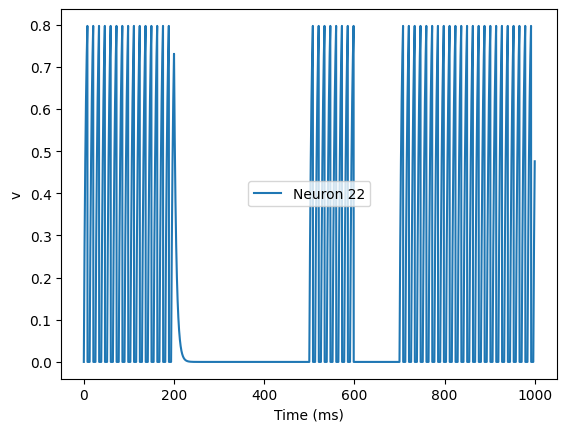

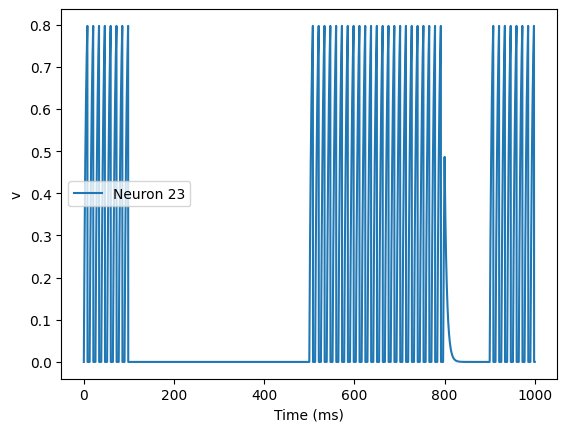

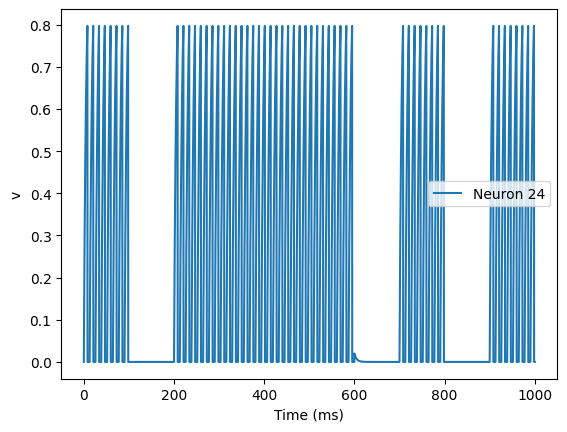

In [17]:
for n in range(N1):
    figure()
    plot(M.t/ms, M.v[n], label='Neuron '+str(n))
    xlabel('Time (ms)')
    ylabel('v')
    legend();

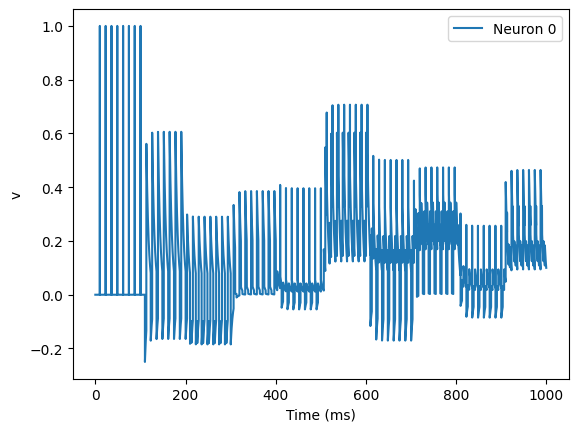

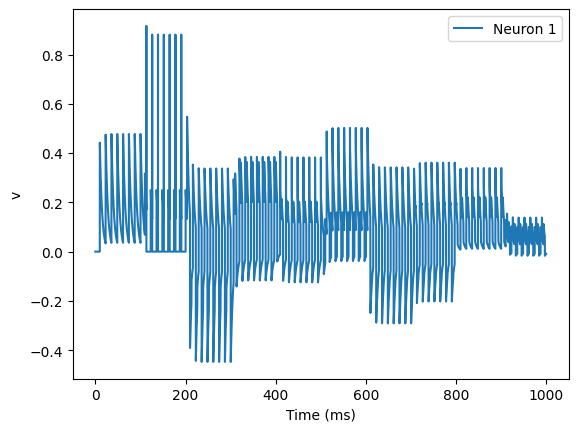

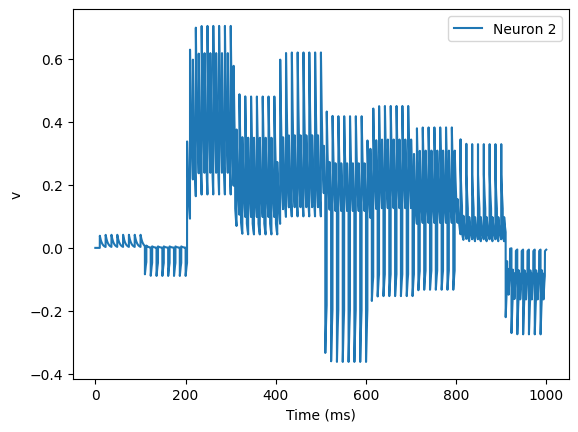

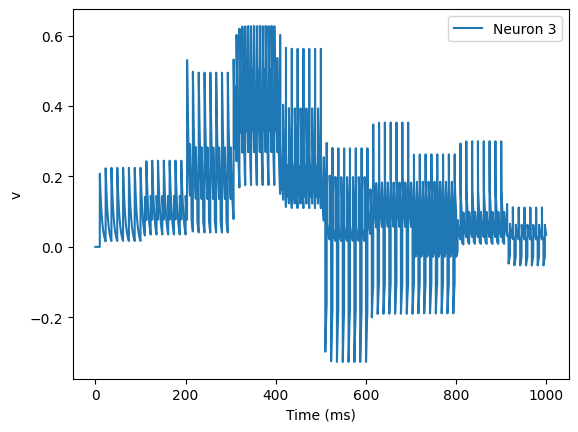

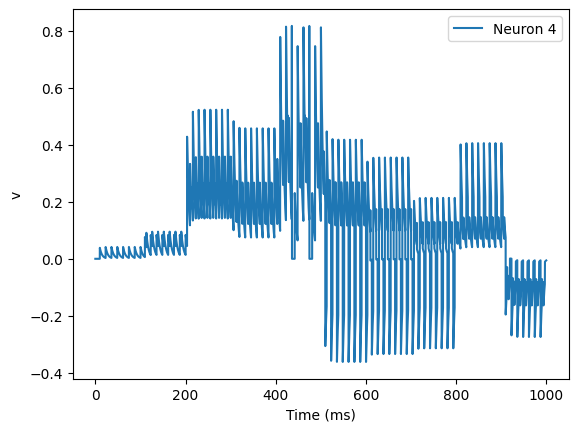

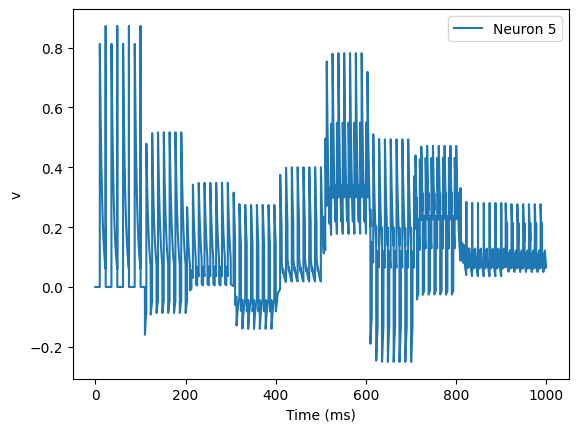

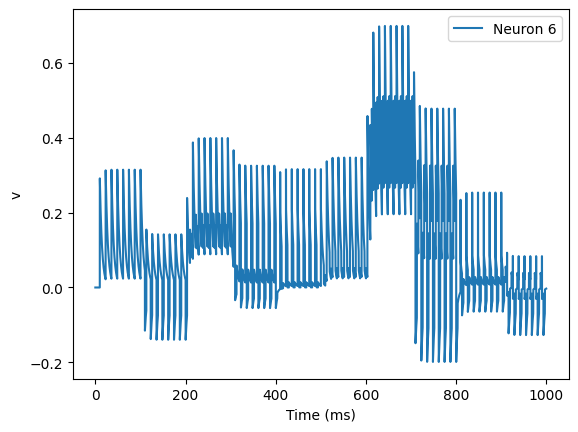

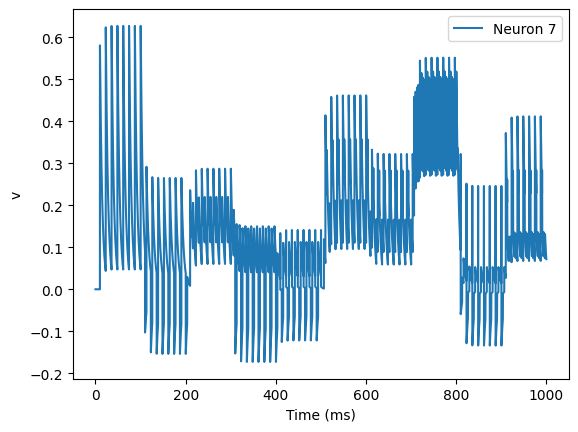

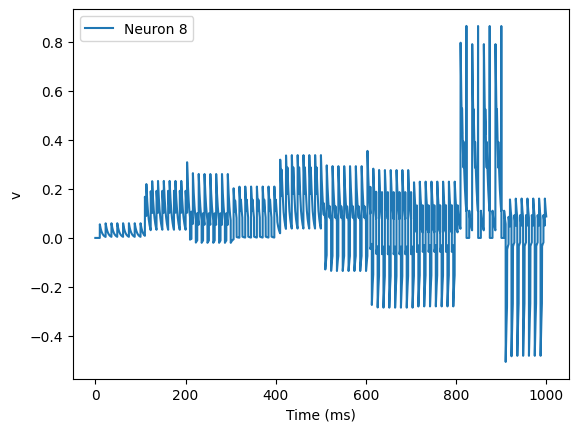

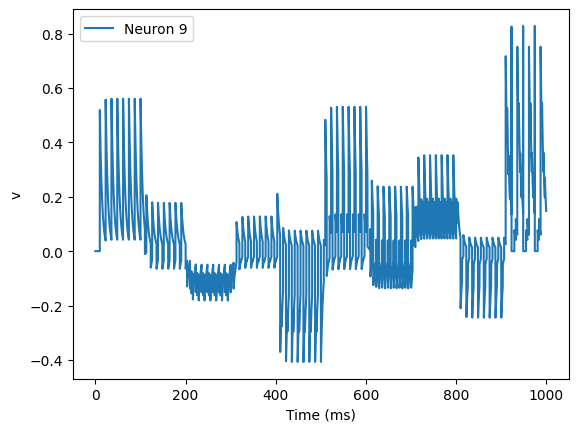

In [18]:
for n in range(N2):
    figure()
    plot(M2.t/ms, M2.v[n], label='Neuron '+str(n))
    xlabel('Time (ms)')
    ylabel('v')
    legend();

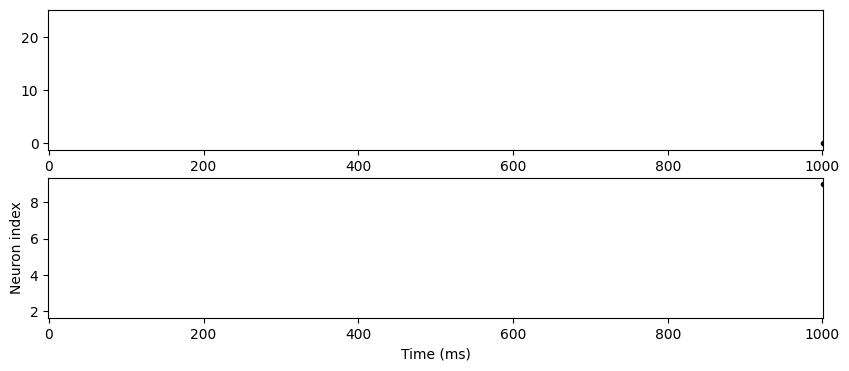

In [22]:
figure(figsize=(10, 4))
subplot(211)
plot(spikeMon.t/ms, spikeMon.i, '.k')
subplot(212)
plot(spikeMon2.t/ms, spikeMon2.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

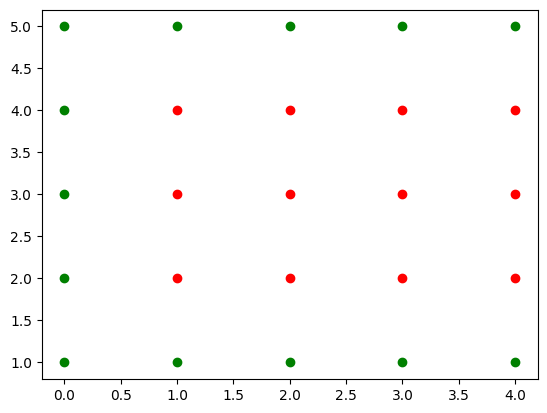

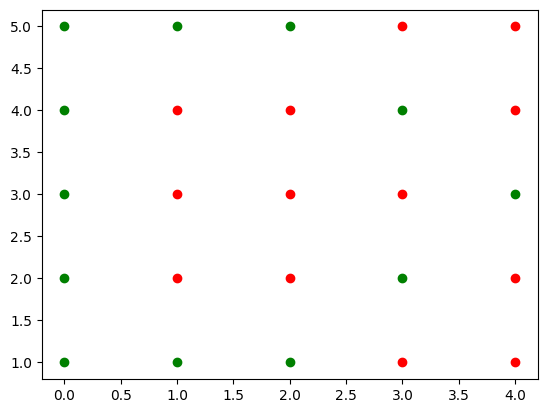

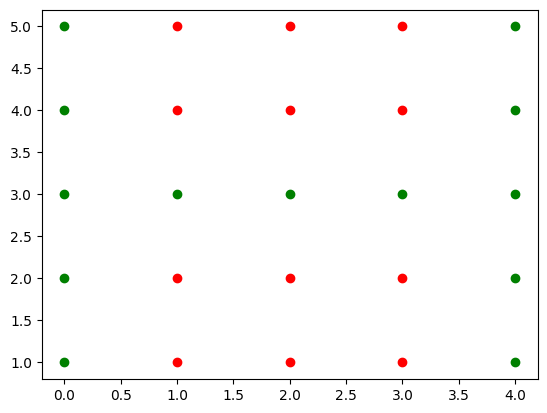

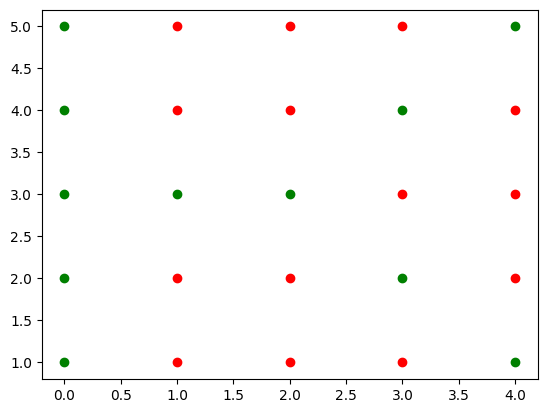

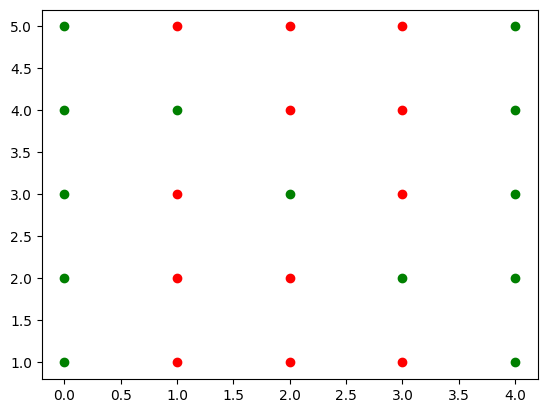

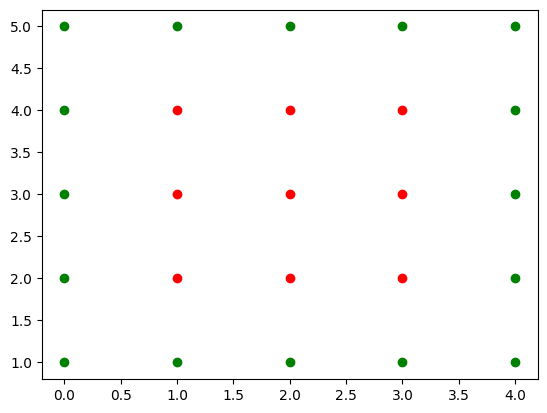

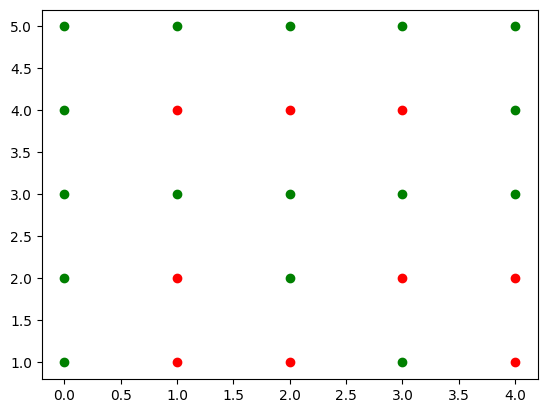

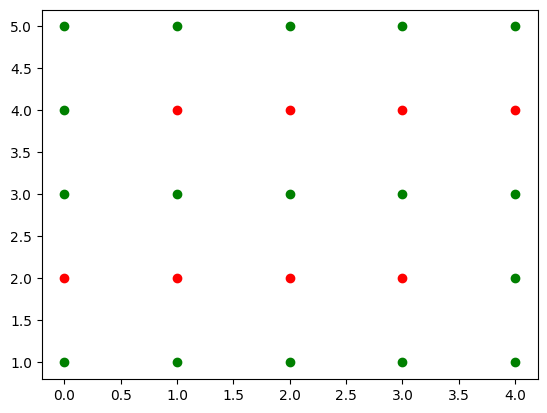

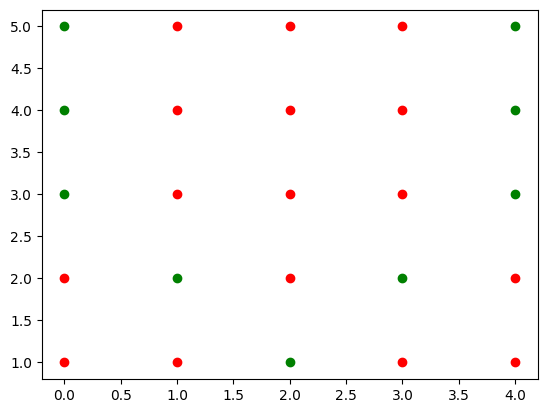

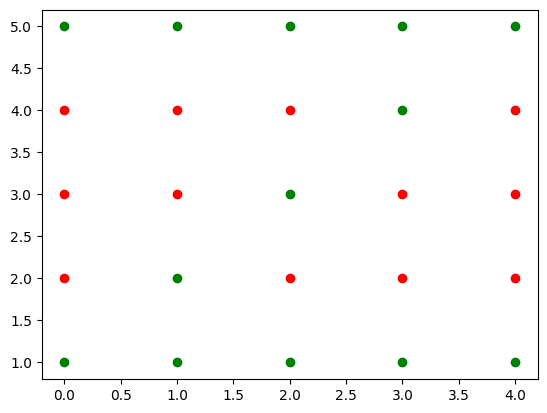

In [174]:
visualise_connectivity(S)